In [172]:
#Die ganzen packages die für den versuch verwendet werden

import numpy as np #numpy ist ein package mit allen mathematischen ausdrücken/funktionen/operationen/etc. 
from uncertainties import ufloat #Uncertainties ist für das automatische berrechnen von unsicherheiten
from uncertainties.umath import * #Importieren von rechnen mit uncertainties (addition/multiplikation/etc.)
from uncertainties import unumpy as unp #kann arrays von unsicherheiten verstehen (also eine liste, statt jede zahl einzeln einzutippen)
from IPython.display import Latex, HTML, Math, display # Um ergebnisse schöner anzuzeigen. display() "ersetzt" quasi print(), und lässt latex fromatierung zu
import matplotlib.pyplot as plt #Damit kann man graphen plotten
from scipy.optimize import curve_fit
from scipy.stats import linregress

import pandas as pd #Um die Spektroskopie daten zu lesen
from scipy.signal import find_peaks #um die maxima von listen (also auch y-achse) zu finden

# Wechselstromspannung

$U_{c,0} = U_{0,0} \frac{A}{B}$

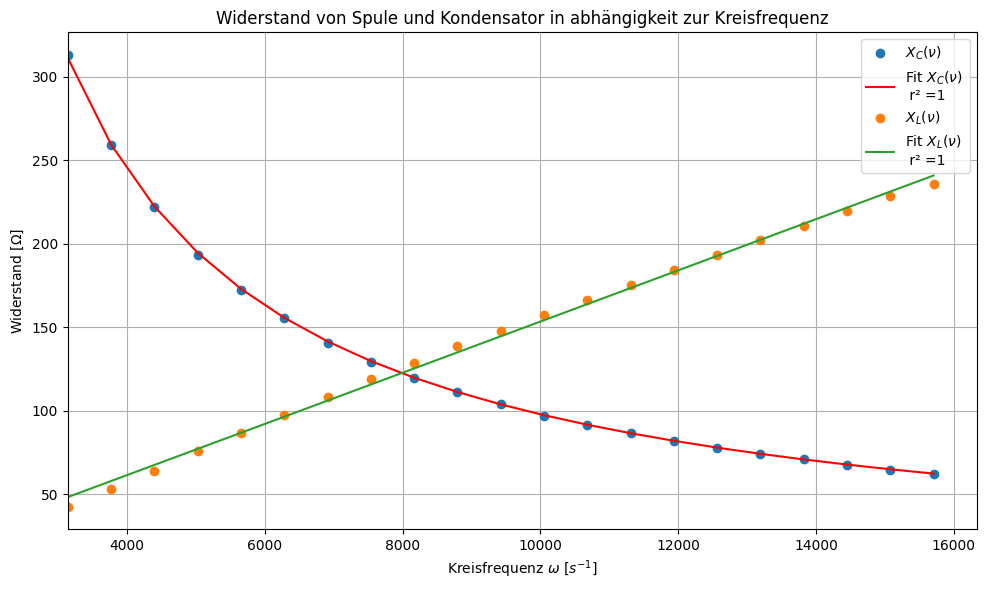

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

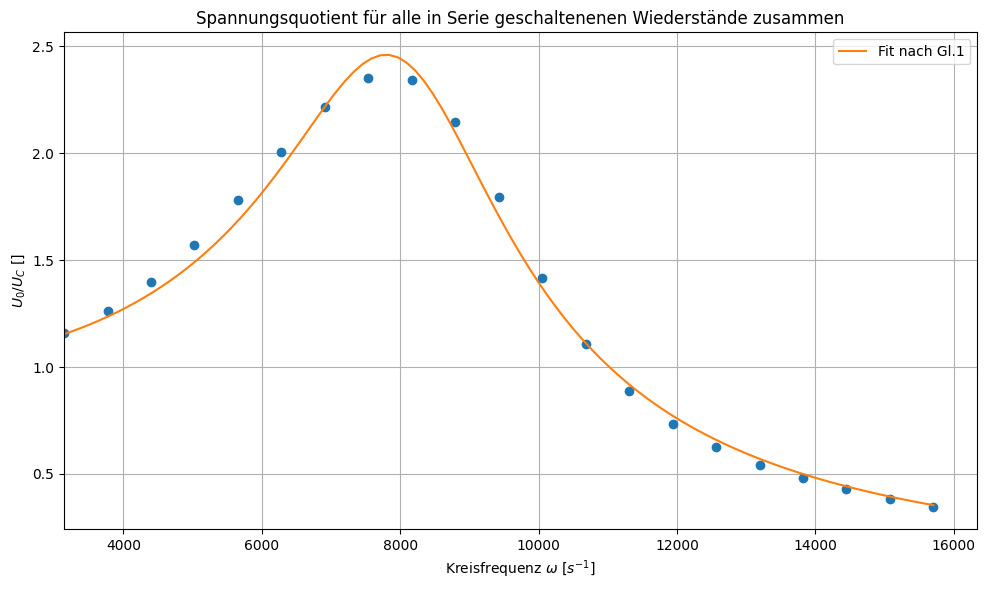

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [176]:
#Ohmscher Widerstand:
R = 26.2

#Spannnungen
U_R = np.array([])

U_C = np.array([])
f_c = np.array([])



U_L = np.array([])
f_l = np.array([])

w = np.array([3141.5, 3769.8, 4398.1, 5026.4, 5654.7, 6283.0, 6911.3, 7539.6, 8167.9, 8796.2, 9424.5, 10052.8, 10681.1, 11309.4, 11937.7, 12566.0, 13194.3, 13822.6, 14450.9, 15079.2, 15707.5])


#Kondensator
X_C = R * (U_C/U_R)
X_C = np.array([313.2, 259.4, 222.1, 193.3, 172.4, 155.8, 140.8, 129.1, 119.5, 111.3, 103.8, 96.9, 91.4, 86.3, 81.8, 77.7, 74.1, 70.7, 67.6, 64.6, 62.1])
#Spule
X_L = R * (U_L/U_R)
X_L = np.array([42.5, 52.9, 64.1, 75.5, 86.3, 97.5, 108.1, 118.8, 128.5, 138.7, 147.7, 157.2, 166.1, 175.3, 184.0, 193.0, 202.5, 210.8, 219.4, 228.7, 236.1])


def XC(w,C):
    return 1/(w*C)
slope_C, pcov = curve_fit(XC, w, X_C)
resc = np.sqrt(np.diag(pcov))

def XL(w,L):
    return (w*L)
slope_L, pcov = curve_fit(XL, w, X_L)
resl = np.sqrt(np.diag(pcov))

C_fit = slope_C[0]
C_err = resc[0]

L_fit = slope_L[0]
L_err = resl[0]


n = "\n"

plt.figure(figsize=(10, 6))
# Kondensator
plt.plot(w,X_C, "o", label=r"$X_C(\nu)$")
plt.plot(w, XC(w, C_fit), 'r-',label=rf"Fit $X_C(\nu)$ {n} r² ={1}")


#Spule
plt.plot(w,X_L, "o", label=r"$X_L(\nu)$")
plt.plot(w, XL(w, L_fit), label=rf"Fit $X_L(\nu)$ {n} r² ={1}")

plt.ylabel(r"Widerstand $[\Omega]$")
plt.xlabel(r"Kreisfrequenz $\omega~[s^{{-1}}]$")
plt.legend()
plt.title("Widerstand von Spule und Kondensator in abhängigkeit zur Kreisfrequenz")
plt.tight_layout()
plt.grid()
plt.xlim(left=min(w))
plt.show()

display(Latex(fr"$$C = ({C_fit*1e6:.3f}\pm{C_err*1e6:.3f}) ~\mathrm{{\mu F}}$$"))
display(Latex(fr"$$L = ({L_fit*1e3:.2f}\pm{L_err*1e3:.2f}) ~\mathrm{{mH}}$$"))



f = np.array([500, 600, 700, 800, 900, 1000, 1100, 1200, 1300, 1400, 1500, 1600, 1700, 1800, 1900, 2000, 2100, 2200, 2300, 2400, 2500])
UC = np.array([1156, 1217, 1284, 1343, 1384, 1397, 1382, 1336, 1258, 1149, 1017, 877, 753, 650, 568, 502, 448, 403, 366, 333, 304])
U0 = np.array([996, 965, 918, 854, 776, 696, 623, 568, 537, 535, 566, 620, 681, 732, 772, 802, 824, 842, 856, 867, 875])

w = 2 * np.pi * f

# fit funktion
def quotient(w, w_0, delta):
    return (w_0**2) / np.sqrt((w_0**2 - w**2)**2 + 4*(delta**2)*(w**2))

p0= [128.143485, 10]

res, pcov = curve_fit(quotient, w, UC/U0, p0=p0)

w0_fit, delta_fit = res
w0_err, delta_err = np.sqrt(np.diag(pcov))


w_fit = np.linspace(min(w),max(w),100)

plt.figure(figsize=(10, 6))
plt.plot(w, UC/U0, "o")
plt.plot(w_fit,quotient(w_fit, w0_fit, delta_fit), "-", label="Fit nach Gl.1")
plt.ylabel(r"$U_0/U_C$ $[]$")
plt.xlabel(r"Kreisfrequenz $\omega~[s^{{-1}}]$")
plt.legend()
plt.title("Spannungsquotient für alle in Serie geschaltenenen Wiederstände zusammen")
plt.tight_layout()
plt.xlim(left=min(w))
plt.grid()
plt.show()

display(Latex(fr"$$\omega_0 = ({w0_fit:.0f}\pm{w0_err:.0f}) ~\mathrm{{s}}^{{-1}}$$"))

display(Latex(fr"$$\delta = ({delta_fit:.0f} \pm {delta_err:.0f})~\mathrm{{s}}^{{-1}}$$"))

R = ufloat(delta_fit,delta_err)*2*ufloat(L_fit,L_err)

display(Latex(fr"$$R = ({unp.nominal_values(R):.0f} \pm {unp.std_devs(R):.0f})~\mathrm{{s}}^{{-1}}$$"))

